# Assignment 4

* My focus is on game player's performances in different mode(solo, duo or squad).<br>
* I suppose that the same player's performances are similar due to their current skills which means solo mode kill-death-ratio, duo mode kill-death-ratio and squad mode kill-death-ratio would have strong relations.<br>
* I will figure out if the hypothesis is correct or not based on the data I have.

In [74]:
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import cross_val_score
import numpy as np
import pandas as pd

In [75]:
csv = pd.read_csv('./PUBG_Player_Statistics.csv')
csv_interest = csv[['solo_KillDeathRatio', 'duo_KillDeathRatio', 'squad_KillDeathRatio']]
kmeans = KMeans(n_clusters=4)

## Part A

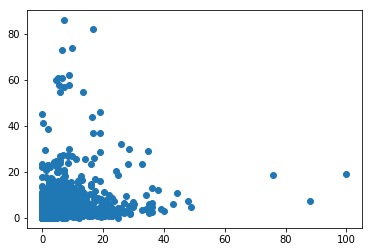

In [76]:
solo = csv['solo_KillDeathRatio'].tolist()
duo = csv['duo_KillDeathRatio'].tolist()
squad = csv['squad_KillDeathRatio'].tolist()
plt.scatter(solo, duo)
plt.show()

Reshape the data for clustering

In [77]:
res = []
for i in range(len(solo)):
    res.append([solo[i], duo[i]])

### KMEANS

[[ 1.33264578  1.19704422]
 [ 3.50066985  2.39930568]
 [12.93544974  3.48138624]
 [ 9.59464286 36.04964286]]
[1 1 1 ... 0 1 0]


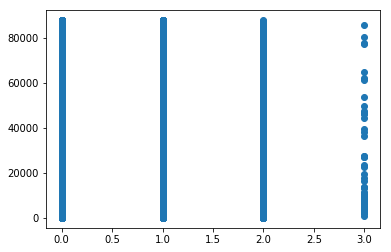

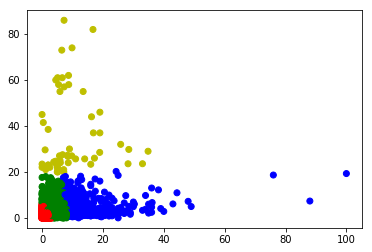

In [78]:
kmeans.fit(res)
centroids = kmeans.cluster_centers_
labels = kmeans.labels_
print(centroids)
print(labels)


def  set_colors(labels, colors='rgbykcmw'):
    colored_labels = []
    for label in labels:
        colored_labels.append(colors[label])
    return colored_labels

plt.scatter(labels, range(len(labels)))
plt.show()
plt.scatter(solo, duo, c=set_colors(labels))
plt.show()

### DBSCAN

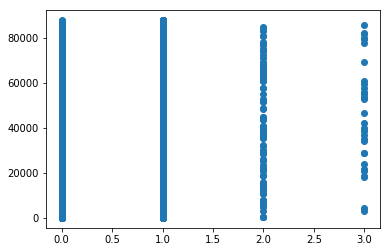

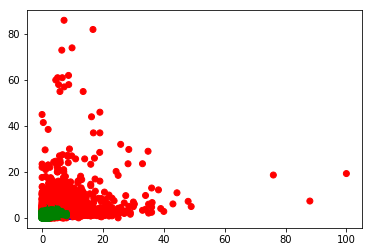

In [79]:
db = DBSCAN(eps=0.3, min_samples=30).fit(res)
labels = db.labels_
new_labels = []
for l in labels:
    new_labels.append(l + 1)
plt.scatter(new_labels, range(len(new_labels)))
plt.show()
plt.scatter(solo, duo, c=set_colors(new_labels))
plt.show()

#### Do the clustering methods generate the same clusters?

No

#### Does scaling effect the clustering?

[[ 13.33069043  11.97335751]
 [129.35449735  34.81386243]
 [ 35.02692119  24.00181395]
 [ 95.94642857 360.49642857]]
[2 2 2 ... 0 2 0]


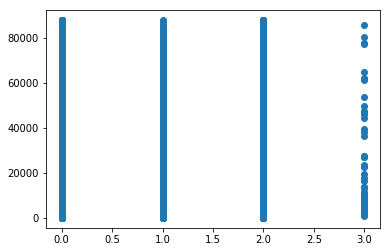

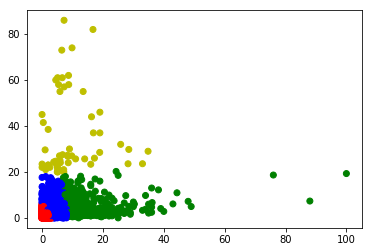

In [80]:
new_res = []
for r in res:
    new_res.append([r[0] * 10, r[1] * 10])
kmeans.fit(new_res)
centroids = kmeans.cluster_centers_
labels = kmeans.labels_
print(centroids)
print(labels)

plt.scatter(labels, range(len(labels)))
plt.show()
plt.scatter(solo, duo, c=set_colors(labels))
plt.show()

As you can see, scaling has no effect on clustering

#### Does the clustering produce interesting groupings?  

No

## Part B

In [81]:
xs = csv[['solo_KillDeathRatio', 'duo_KillDeathRatio']]
ys = csv[['squad_KillDeathRatio']]
model = linear_model.LinearRegression()
result = model.fit(xs, ys)
print (result.intercept_, result.coef_)

[0.57009472] [[0.14092304 0.38768211]]


squad = 0.57009472 + 0.14092304 * solo + 0.38768211 * duo

#### Is the relationship significant?

Yes

#### Are any model assumptions violated? 

No

#### Is there any multi-colinearity in the model?  

In [82]:
csv_interest.corr()

,solo_KillDeathRatio,duo_KillDeathRatio,squad_KillDeathRatio
solo_KillDeathRatio,1.00000,0.386140,0.431240
duo_KillDeathRatio,0.38614,1.000000,0.591153
squad_KillDeathRatio,0.43124,0.591153,1.000000


There is some multi-colinearity but not significant

 #### In the multiple regression models are predictor variables independent of all the other predictor variables? 

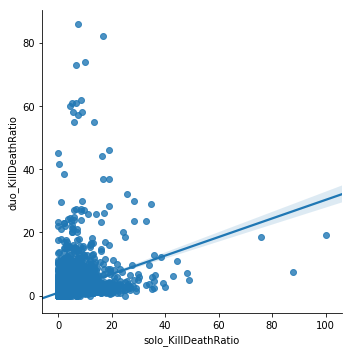

In [83]:
sns.lmplot(x="solo_KillDeathRatio", y="duo_KillDeathRatio", data=csv)
plt.show()

#### In multiple regression models rank the most significant predictor variables and exclude insignificant ones from the model. 

As we can see from correlation table, duo has highest correlation with squad so we use duo as predictor

In [84]:
xs = csv[['duo_KillDeathRatio']]
ys = csv[['squad_KillDeathRatio']]
model = linear_model.LinearRegression()
result = model.fit(xs, ys)
print (result.intercept_, result.coef_)

[0.72803658] [[0.45923726]]


#### Does the model make sense?  

Yes, same people should have similar performances in different modes and the more teammates the player has, the more similar the data is compared with squad mode

#### Cross-validate the model. How well did it do?  

In [85]:
x=csv[["solo_KillDeathRatio","duo_KillDeathRatio"]].values
y=csv[["squad_KillDeathRatio"]].values
score = cross_val_score(model,x,y)
score

array([0.38743941, 0.38497405, 0.34426746])

Not very satisfying

## Part C

In [86]:
xs = csv[['solo_KillDeathRatio']]
ys = csv[['squad_KillDeathRatio']]
new_ys = []
for y in ys.values:
    if y[0] >= 1:
        new_ys.append(1)
    else:
        new_ys.append(0)
lr = LogisticRegression(C=1e9)
result = lr.fit(xs, new_ys)

Float is not acceptable as classifier, so I use 1(ratio) as a divider to decide whether the player's behavior is good or not

In [87]:
result.coef_

array([[1.61783424]])

In [88]:
result.intercept_

array([-1.68393594])

#### Is the relationship significant?  

No

#### Are any model assumptions violated?   

No

#### Cross-validate the model. How well did it do?   

In [89]:
cross_val_score(result,xs,new_ys)

array([0.77238908, 0.77487286, 0.76876344])

The result is not good, meaning the relation between solo mode kill-death-ratio and squad mode kill-death-ratio is not significant

I expected the player's solo mode performance will have a strong linear relation with squad mode(same player), but the result of the analysis states that they are not significantly related